In [1]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
from IPython.html import widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive
import pandas as pd
import numpy as np
import warnings 

In [3]:
df=pd.read_csv("crop.csv")
df1=df

In [4]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
df.shape

(246091, 7)

In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
df.isnull().sum()*100/len(df)

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

#### You can see from the data set we have missing values in Production replace missing the values with thier mean, the missing values in Production attribute  is very less 1.5% percentage of missing values

In [8]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [9]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [10]:
df=df.dropna()

In [11]:
df2=df1
df2=df2.dropna()

In [12]:
l=list(df.columns.values)
l

['State_Name',
 'District_Name',
 'Crop_Year',
 'Season',
 'Crop',
 'Area',
 'Production']

In [13]:
df2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [14]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


##### converting caterogical data to numerical data


In [15]:
from sklearn.preprocessing import LabelEncoder
le_df=LabelEncoder()

In [16]:
df2["State_Name"]=le_df.fit_transform(df2["State_Name"])
df2["District_Name"]=le_df.fit_transform(df2["District_Name"])
df2["Season"]=le_df.fit_transform(df2["Season"])
df2["Crop"]=le_df.fit_transform(df2["Crop"])

In [18]:
df2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0


In [19]:
df2.shape

(242361, 7)

In [20]:
from sklearn.preprocessing import normalize
n=normalize(df2)

In [21]:
X=df2.iloc[:,:-1]
Y=df2.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [23]:
m=RandomForestRegressor(n_estimators=100)
m.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [26]:
y_p=m.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_log_error
s = mean_squared_log_error(y_test.values, y_p)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_p)

0.9030859120087069

Text(0.5, 1.0, 'Perfomance of Our Model')

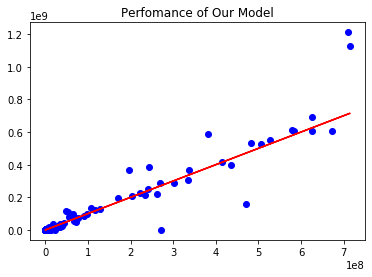

In [29]:
plt.scatter(y_p,y_test,c="b")
plt.plot(y_p,y_p,c="r")
plt.title("Perfomance of Our Model")

In [30]:
df4=df

In [31]:
df3=df4

In [32]:
df3["State_Number"]=df2["State_Name"]
df3["District_Number"]=df2["District_Name"]

In [33]:
dd1={}
a=df["State_Name"].unique()
for i in range(len(a)):
    df2=df[df["State_Name"]==a[i]]
    dn=df2["District_Name"].unique()
    dd1[a[i]]=list(dn)

In [34]:
dd2={}
a1=df["District_Name"].unique()
for i in range(len(a1)):
    df2=df[df["District_Name"]==a1[i]]
    dn=df2["Season"].unique()
    dd2[a1[i]]=list(dn)

In [35]:
from IPython.html import widgets
from IPython.display import display

geo=dd1
geo1=dd2
l2=[]
l5=[]
l=[]
def print_city(District):
    
    print("Your Selected District:",District)
    l2.append(District)
    
def select_city(State):
    cityW.options = geo[State]
    l5.append(State)
#def select_season(district):
 #   distW.options = geo1[district]
    
#def print_season(season):
 #   print(season)
    
scW = widgets.Select(options=geo.keys())
init = scW.value
cityW = widgets.Select(options=geo[init])
#distW = widgets.Select(options=geo1[cityW.value])
j = widgets.interactive(print_city, District=cityW,State=scW)
i = widgets.interactive(select_city, State=scW)
#i1= widgets.interactive(print_city,District=distW)
display(i)
display(j)
#display(i1)

interactive(children=(Select(description='State', options=('Andaman and Nicobar Islands', 'Andhra Pradesh', 'A…

interactive(children=(Select(description='District', options=('NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH A…

##### From the above drop downs you selected the 
###### 1. State Name
###### 2. District Name

0:Summer     ,1:Kharif     ,2:Whole Year ,3:Rabi       ,
Enter In which season you are going to Start the crop:
2
You Selected Season: Whole Year 
0:Sweet potato ,1:Cashewnut ,2:Garlic ,3:Peas & beans (Pulses) ,4:Papaya ,5:Turmeric ,6:Arcanut (Processed) ,7:Banana ,8:Dry ginger ,9:Coriander ,10:Onion ,11:Dry chillies ,12:Other Fresh Fruits ,13:Coconut  ,14:Tapioca ,15:Grapes ,16:Mango ,17:Pome Fruit ,18:Potato ,19:Atcanut (Raw) ,20:Sugarcane ,21:Beans & Mutter(Vegetable) ,22:Arecanut ,23:Black pepper ,24:Brinjal ,25:Tomato ,
Enter the Crop that your are going to Start:
25
You selected Crop_Name: Tomato
Enter The Area(In Acres):
3
You Enter Area(In Acres): 3


Enter In which year you need to see your crop production:
2020
Future Crop Production: [1.46]

Analysis On Your Selected Crop From Previous Years Based On Area you select


Crop Analysis on Selected State,District,Season


Text(0.5, 0.98, 'Analysis On Your Selected District all the crops From Previous Years Based On Area you select')

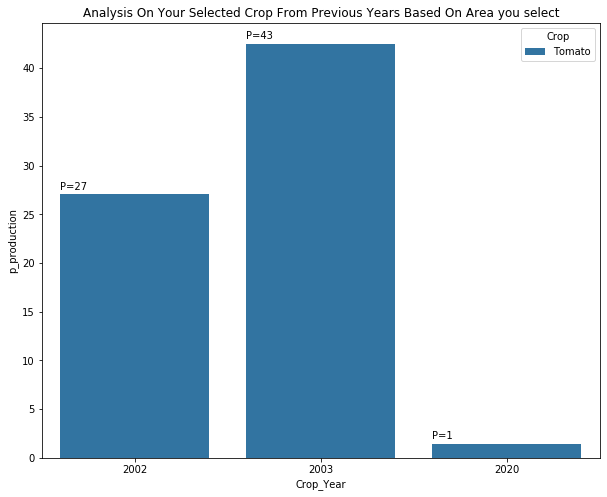

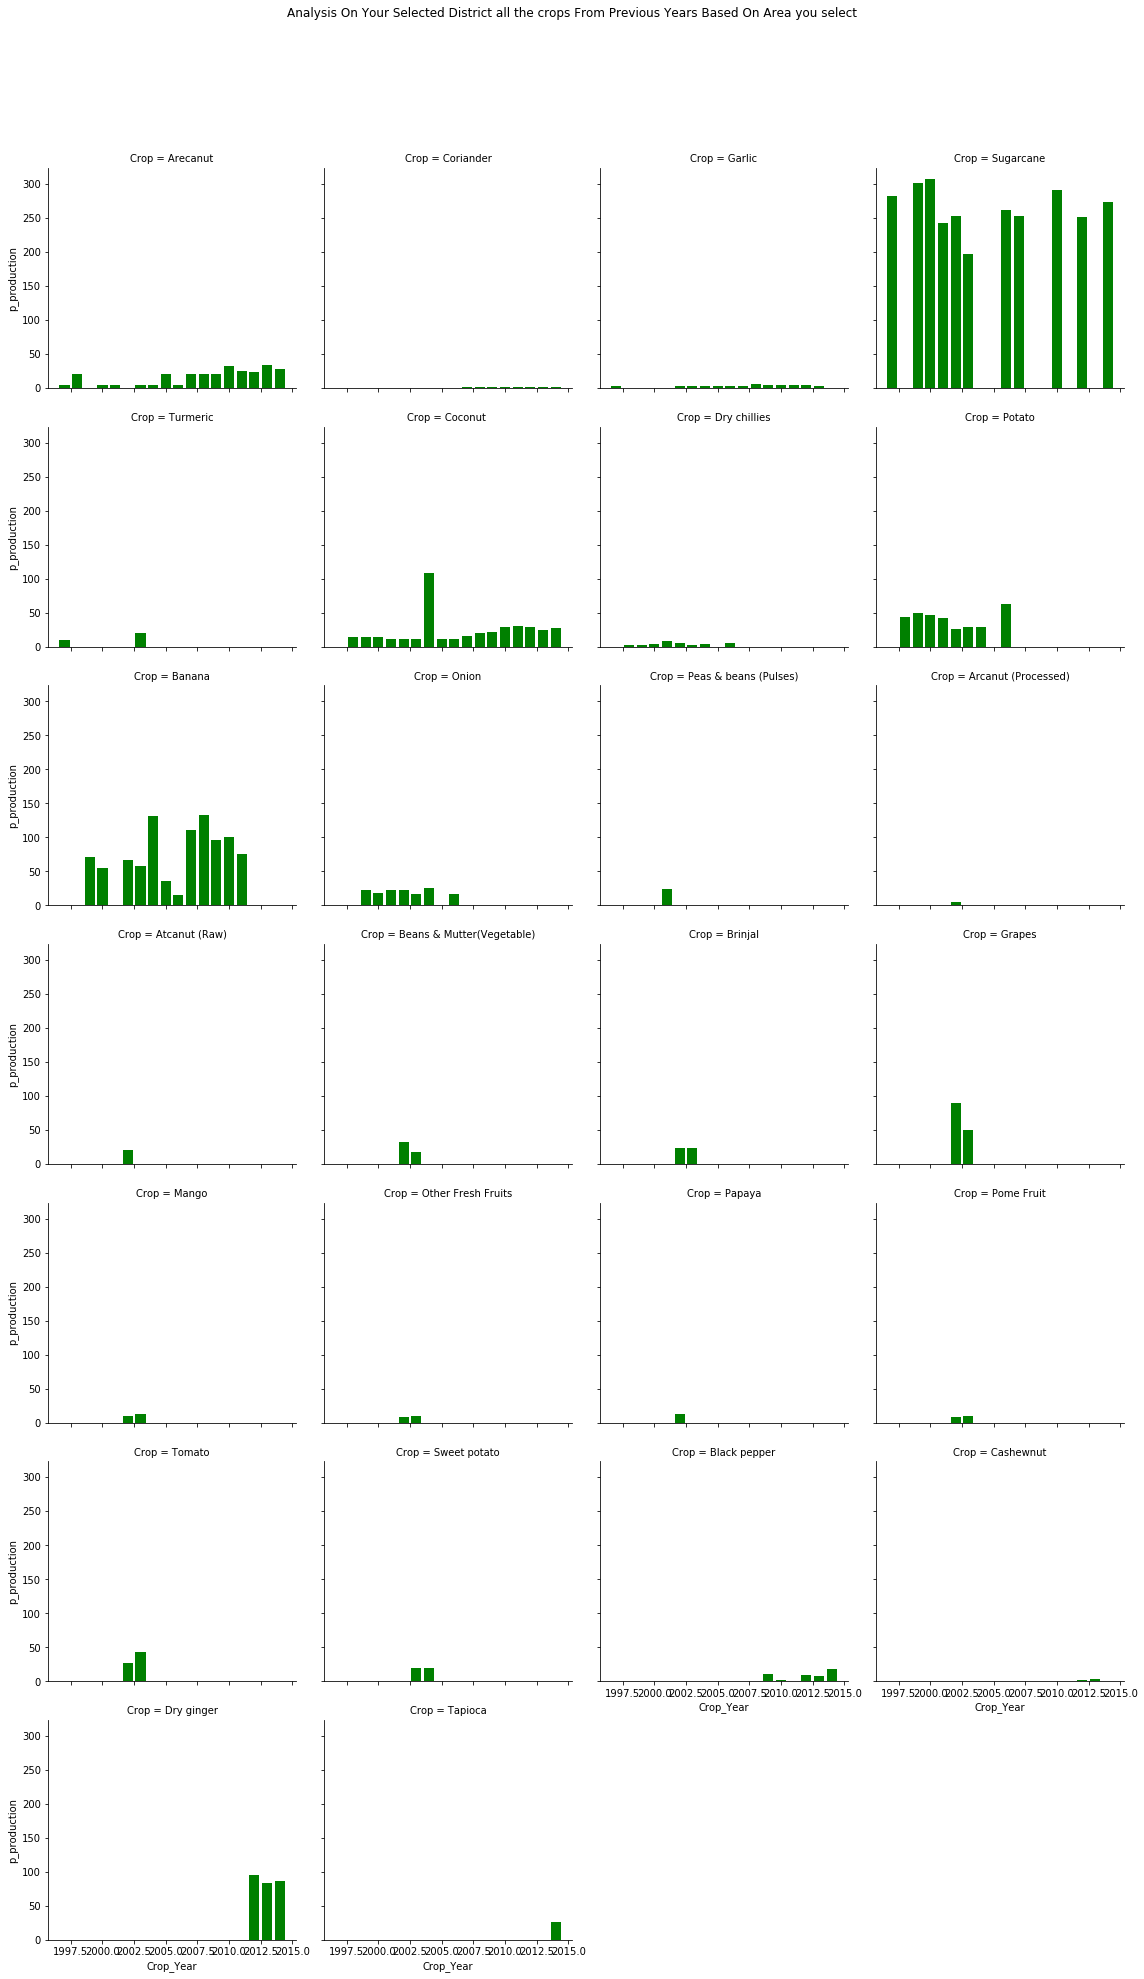

In [38]:
l=[]
l1=[]
k=l5[-1]
k1=l2[-1]
d=df[df["State_Name"]==k]
#print("You Seleced District_Name:",s1[k1])
d1=d[d["District_Name"]==k1]
s2=list(set(d1["Season"]))
for i in range(len(s2)):
    print(str(i)+":"+s2[i]+",",end="")
print("\r")
print("Enter In which season you are going to Start the crop:")
k2=int(input())
print("You Selected Season:",s2[k2])
d2=d1[d1["Season"]==s2[k2]]
s3=list(set(d2["Crop"]))
for i in range(len(s3)):
    
    print(str(i)+":"+s3[i],",",end="")
print("\r")
print("Enter the Crop that your are going to Start:")
k3=int(input())
print("You selected Crop_Name:",s3[k3])
print("Enter The Area(In Acres):")
k4=int(input())
print("You Enter Area(In Acres):",k4)
print("\r")
print("\r")
print("Enter In which year you need to see your crop production:")
k5=int(input())
k_num=df3[df3["State_Name"]==k]["State_Number"].unique()[0]
k1_num=df3[df3["District_Name"]==k1]["District_Number"].unique()[0]
l.append(k_num)
l.append(k1_num)
l.append(k5)
l.append(k2)
l.append(k3)
l.append(k4)
a=np.array(l)
z=m.predict(a.reshape(1,-1))
print("Future Crop Production:",z)
print("\r")
print("Analysis On Your Selected Crop From Previous Years Based On Area you select")
j=pd.DataFrame()
[k,k1,k5,s2[k2],s3[k3],4]
j["State_Name"]=[k]
j["District_Name"]=[k1]
j["Crop_Year"]=[k5]
j["Season"]=s2[k2]
j["Crop"]=s3[k3]
j["Area"]=[k4]
j["Production"]=z
j["p_production"]=z
d2["p_production"]=(d2["Production"]/d2["Area"])*[k4]
d3=d2[d2["Crop"]==s3[k3]]
#d3["p_production"]=(d3["Production"]/d3["Area"])*[k4]
d3=d3.append(j)
plt.figure(figsize=(10,8))
ax1=sns.barplot(x=d3["Crop_Year"],y=d3["p_production"],hue=d3["Crop"])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0, height+ 0.5, 'P=%.0f'%(height))
plt.title("Analysis On Your Selected Crop From Previous Years Based On Area you select")
print("\r")
print("\r")
print("Crop Analysis on Selected State,District,Season")
g = sns.FacetGrid(d2, col="Crop", col_wrap=4, height=4)
g = g.map(plt.bar, "Crop_Year", "p_production",color="g")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Analysis On Your Selected District all the crops From Previous Years Based On Area you select')

###### Recomended Crop

In [39]:
j1=j

Based on the Previous Year Analysis To Get More Production We Recommend You The Crop Sugarcane To Get More Production


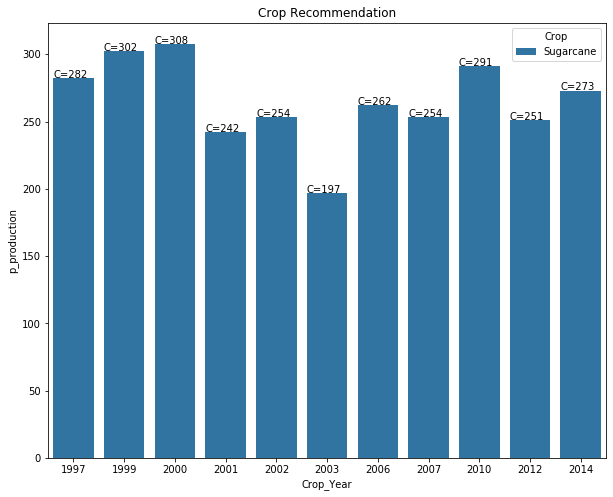

In [40]:
plt.figure(figsize=(10,8))
gp=d2.groupby(["Crop"]).sum()
#gp1=d2.groupby(["Crop","Crop_Year"]).sum()
most=max(gp["p_production"])
most1=gp[gp["p_production"]==most]
#gp.loc["Urad",:]
d8=d2[d2["Crop"]==most1.index[0]]
print("Based on the Previous Year Analysis To Get More Production We Recommend You The Crop",most1.index[0],"To Get More Production")
ax=sns.barplot(x=d8["Crop_Year"],y=d8["p_production"],hue=d8["Crop"])
plt.title("Crop Recommendation")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 0.2, 'C=%.0f'%(height))

##### fertilizer recomendation

In [41]:
f=pd.read_csv("water.csv")

In [42]:
f.head()

,Crop_Name,fertilizer1,fertilizer2,fertilizer3,f1_qunatity,f2_qunatity,f3_qunatity,Min Crop water need,Max Crop water needs
0,other fibres,Based,Based,Based,0.0,0.0,0.0,0,0
1,Orange,Nitrogen,Phosphorous,Potassium,80.0,20.0,10.0,550,750
2,Pear,Nitrogen,Phosphorous,Potassium,13.0,13.0,13.0,700,900
3,Coriander,Nitrogen,Phosphorous,Potassium,50.0,10.0,10.0,800,1000
4,Groundnut,Nitrogen,Phosphorous,Potassium,20.0,40.0,40.0,350,450


In [43]:
f1=f[f["Crop_Name"]==s3[k3]]
first=f1["fertilizer1"].values[0]
second=f1["fertilizer2"].values[0]
third=f1["fertilizer3"].values[0]
f1_q=f1["f1_qunatity"].values[0]
f2_q=f1["f2_qunatity"].values[0]
f3_q=f1["f3_qunatity"].values[0]
f_list=[first,second,third]
fq_list=[f1_q,f2_q,f3_q]
explode=(0,0,0.2)

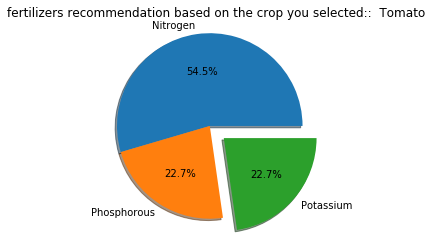

In [44]:
fig1, ax1 = plt.subplots()
ax1.pie(fq_list, explode=explode, labels=f_list, autopct='%1.1f%%',shadow=True, startangle=360)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("fertilizers recommendation based on the crop you selected::"+"  "+str(s3[k3]))
plt.show()

#### Water Recommendation
##### Crop water need (mm/total growing period)
###### Generally crops require 300-500mm of rainfall/water for their growth; however, sugar cane requires 1,500-2,500mm of rainfall/water to complete the growth cycle. Therefore, the crop requires 1500-3000 liters of water to produce a kilo of sugarcane!

In [45]:
water=pd.read_csv("water.csv")

In [46]:
water.isnull().sum()

Crop_Name                0
fertilizer1              0
fertilizer2              0
fertilizer3              0
f1_qunatity              0
f2_qunatity              0
f3_qunatity              0
Min Crop water need      0
Max  Crop water needs    0
dtype: int64

In [47]:
water.head()

,Crop_Name,fertilizer1,fertilizer2,fertilizer3,f1_qunatity,f2_qunatity,f3_qunatity,Min Crop water need,Max Crop water needs
0,other fibres,Based,Based,Based,0.0,0.0,0.0,0,0
1,Orange,Nitrogen,Phosphorous,Potassium,80.0,20.0,10.0,550,750
2,Pear,Nitrogen,Phosphorous,Potassium,13.0,13.0,13.0,700,900
3,Coriander,Nitrogen,Phosphorous,Potassium,50.0,10.0,10.0,800,1000
4,Groundnut,Nitrogen,Phosphorous,Potassium,20.0,40.0,40.0,350,450


In [48]:
water[water["Crop_Name"]==s3[k3]]

,Crop_Name,fertilizer1,fertilizer2,fertilizer3,f1_qunatity,f2_qunatity,f3_qunatity,Min Crop water need,Max Crop water needs
16,Tomato,Nitrogen,Phosphorous,Potassium,12.0,5.0,5.0,400,800


###### feature importance

Text(0.5, 0, 'Relative Importance')

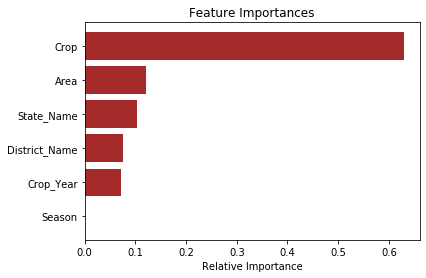

In [49]:
features=df.columns
importance=m.feature_importances_
indices=np.argsort(importance)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='brown', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

##### Year Wise Crop Production Visulisation based on the district

In [53]:
from IPython.html import widgets
from IPython.display import display

geo2=dd1
geo3=dd2
l6=[]
l7=[]
l8=[]
def print_city(District):
    
    print(District)
    l6.append(District)
    di=df[df["District_Name"]==District]
    plt.figure(figsize=(10,6))
    sns.lineplot(x=di["Crop_Year"],y=di["Production"],hue=di["District_Name"])
    
def select_city(State):
    city.options = geo2[State]
    l7.append(State)
def select_season(district):
    dist.options = geo3[district]
    
def print_season(season):
    print(season)
    
sc = widgets.Select(options=geo2.keys())
ini = sc.value
city = widgets.Select(options=geo2[ini])
#dist = widgets.Select(options=geo1[cityW.value])
j1 = widgets.interactive(print_city, District=city,State=sc)
i1 = widgets.interactive(select_city, State=sc)
#i1= widgets.interactive(print_city,District=distW)
display(i1)
display(j1)
#display(i1)

interactive(children=(Select(description='State', options=('Andaman and Nicobar Islands', 'Andhra Pradesh', 'A…

interactive(children=(Select(description='District', options=('NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH A…

###### Recommendation System for industries

In [56]:
d9=df.groupby(["State_Name","Crop"])["Production"].sum()
d9=d9.reset_index(level=['State_Name', 'Crop'])

In [57]:
d9.head()

,State_Name,Crop,Production
0,Andaman and Nicobar Islands,Arecanut,48035.81
1,Andaman and Nicobar Islands,Arhar/Tur,104.00
2,Andaman and Nicobar Islands,Banana,97424.65
3,Andaman and Nicobar Islands,Black pepper,724.50
4,Andaman and Nicobar Islands,Cashewnut,1684.79


In [58]:
l=["0"]

crop = widgets.Dropdown(
    options=['All'] + list(d9['Crop'].unique()),
    value='All',
    description='Crop_Name:',
)
  

def plot(crop):
    
    k=d9[d9["Crop"]==str(crop)].groupby(["State_Name"])["Production"].sum().sort_values(ascending=False)[:9]
    m=pd.DataFrame(k)
    k1=round((m["Production"]/m["Production"].sum())*100,2).values
    l=[]
    for i in range(len(k1)):
        z=k.keys()[i]+" "+str(k1[i])+"%"
        l.append(z)
    
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

    wedges, texts= ax.pie(k.values,labels=k.keys(),wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center") 
    ax.legend(wedges, l,
          title="State_Name",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
    ax.text(0,0,str(crop),ha="center")
    
interactive(plot,crop=crop)
    

interactive(children=(Dropdown(description='Crop_Name:', options=('All', 'Arecanut', 'Arhar/Tur', 'Banana', 'B…